In [2]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML

In [3]:
pa_latin_art = pd.read_csv('../data_samples/pa_latin_art.csv')
stored_latin_art = pa_latin_art.where(pa_latin_art.file_downloaded == True).dropna(how='all')
stored_latin_art.reset_index(drop = True, inplace=True)

## Exploratory Data Analysis

### Amount of NA/Null Values per Feature in the Dataset

In [4]:
num_nulls = pd.isna(stored_latin_art)

In [5]:
num_nulls = num_nulls.sum() / len(num_nulls)

In [6]:
num_nulls = num_nulls.sort_values(ascending=False).where(num_nulls > 0).dropna()

In [7]:
num_nulls

assistivetext     1.000000
markings          0.756098
parentid          0.737805
series            0.682927
portfolio         0.539634
provenancetext    0.506098
inscription       0.500000
dimensions        0.307927
ulanid            0.201220
maxpixels         0.152439
lastname          0.009146
dtype: float64

### Dataset Distributions

In [73]:
stored_latin_art.columns

Index(['expanded_url', 'title', 'forwarddisplayname', 'medium', 'displaydate',
       'sequence', 'width', 'height', 'maxpixels', 'depictstmsobjectid',
       'assistivetext', 'objectid', 'displayorder', 'constituentid', 'ulanid',
       'preferreddisplayname', 'lastname', 'nationality', 'constituenttype',
       'Percent_in_NGA', 'Country', 'Continent', 'Country Name', 'accessioned',
       'dimensions', 'inscription', 'markings', 'attributioninverted',
       'attribution', 'provenancetext', 'creditline', 'classification',
       'parentid', 'isvirtual', 'portfolio', 'series', 'file_name',
       'directory', 'file_downloaded', 'en_translation', 'artist_zscore',
       'percent_by_artist', 'log_percent_by_artist', 'log_width',
       'log_height'],
      dtype='object')

In [81]:
stored_latin_art

,expanded_url,title,forwarddisplayname,medium,displaydate,sequence,width,height,maxpixels,depictstmsobjectid,...,series,file_name,directory,file_downloaded,en_translation,artist_zscore,percent_by_artist,log_percent_by_artist,log_width,log_height
0,https://api.nga.gov/iiif/95bc5221-79a1-49e1-b7...,Festival Andino,Nemesio Antunez,color lithograph,"Chilean, 1918 - 1993",0.0,2963.0,4000.0,640.0,46741.0,...,NaN,Festival_Andino.jpg,./All_Images,True,Andean festival,-0.642809,0.003049,0.003044,7.994295,8.294300
1,https://api.nga.gov/iiif/f8a0c85d-7cfa-4e63-ae...,Chester Dale,Diego Rivera,oil on canvas,"Mexican, 1886 - 1957",0.0,5297.0,4171.0,640.0,46537.0,...,NaN,Chester_Dale.jpg,./All_Images,True,Chester Dale,0.197787,0.018293,0.018127,8.575085,8.336151
2,https://api.nga.gov/iiif/a2bc5dff-08a4-46d5-97...,Compostion XVI,Matta,"color etching, soft-ground, and aquatint with ...","Chilean, 1911 - 2002",0.0,2926.0,4000.0,640.0,48425.0,...,"Suite from ""Come detta dentro vo significando""",Compostion_XVI.jpg,./All_Images,True,Composition XVI,2.215217,0.054878,0.053425,7.981733,8.294300
3,https://api.nga.gov/iiif/c73c0136-d48d-4bea-89...,Compostion IV,Matta,"color etching, soft-ground, and aquatint","Chilean, 1911 - 2002",0.0,4000.0,3101.0,640.0,48413.0,...,"Suite from ""Come detta dentro vo significando""",Compostion_IV.jpg,./All_Images,True,Compostion IV,2.215217,0.054878,0.053425,8.294300,8.039802
4,https://api.nga.gov/iiif/1f1918c9-9d30-4491-a9...,Compostion I,Matta,"color etching, soft-ground, and aquatint on Ja...","Chilean, 1911 - 2002",0.0,4000.0,3084.0,640.0,48410.0,...,"Suite from ""Come detta dentro vo significando""",Compostion_I.jpg,./All_Images,True,Compostion I,2.215217,0.054878,0.053425,8.294300,8.034307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,https://api.nga.gov/iiif/552e99b7-0bb5-45e1-8b...,Gran Alarma Escandalosa,José Guadalupe Posada,metalcut and letterpress on pink newsprint,"Mexican, 1851 - 1913",0.0,4949.0,7513.0,NaN,152826.0,...,NaN,Gran_Alarma_Escandalosa_Posada.jpg,./All_Images,True,Big scandalous alarm,0.029668,0.015244,0.015129,8.507143,8.924523
324,https://api.nga.gov/iiif/83c83210-819e-4c27-8c...,Serafina,José Guadalupe Posada,metalcut and letterpress on yellow newsprint,"Mexican, 1851 - 1913",0.0,2873.0,4000.0,NaN,152827.0,...,NaN,Serafina_Posada.jpg,./All_Images,True,Serafina,0.029668,0.015244,0.015129,7.963460,8.294300
325,https://api.nga.gov/iiif/92410def-988a-4866-9c...,La Mujer de Cien Maridos - Como Alfileres Pren...,José Guadalupe Posada,metalcut on red newsprint,"Mexican, 1851 - 1913",0.0,2726.0,4000.0,NaN,152829.0,...,NaN,La_Mujer_de_Cien_Maridos_-_Como_Alfileres_Pren...,./All_Images,True,The wife of a hundred husbands like pins on,0.029668,0.015244,0.015129,7.910957,8.294300
326,https://api.nga.gov/iiif/fcbe84cb-faa8-471d-b4...,Don Chepito,José Guadalupe Posada,relief etching on pink paper,"Mexican, 1851 - 1913",0.0,4000.0,3169.0,NaN,163508.0,...,NaN,Don_Chepito_Posada.jpg,./All_Images,True,Don Chepito,0.029668,0.015244,0.015129,8.294300,8.061487


In [74]:
stored_latin_art.head()

,expanded_url,title,forwarddisplayname,medium,displaydate,sequence,width,height,maxpixels,depictstmsobjectid,...,series,file_name,directory,file_downloaded,en_translation,artist_zscore,percent_by_artist,log_percent_by_artist,log_width,log_height
0,https://api.nga.gov/iiif/95bc5221-79a1-49e1-b7...,Festival Andino,Nemesio Antunez,color lithograph,"Chilean, 1918 - 1993",0.0,2963.0,4000.0,640.0,46741.0,...,NaN,Festival_Andino.jpg,./All_Images,True,Andean festival,-0.642809,0.003049,0.003044,7.994295,8.294300
1,https://api.nga.gov/iiif/f8a0c85d-7cfa-4e63-ae...,Chester Dale,Diego Rivera,oil on canvas,"Mexican, 1886 - 1957",0.0,5297.0,4171.0,640.0,46537.0,...,NaN,Chester_Dale.jpg,./All_Images,True,Chester Dale,0.197787,0.018293,0.018127,8.575085,8.336151
2,https://api.nga.gov/iiif/a2bc5dff-08a4-46d5-97...,Compostion XVI,Matta,"color etching, soft-ground, and aquatint with ...","Chilean, 1911 - 2002",0.0,2926.0,4000.0,640.0,48425.0,...,"Suite from ""Come detta dentro vo significando""",Compostion_XVI.jpg,./All_Images,True,Composition XVI,2.215217,0.054878,0.053425,7.981733,8.294300
3,https://api.nga.gov/iiif/c73c0136-d48d-4bea-89...,Compostion IV,Matta,"color etching, soft-ground, and aquatint","Chilean, 1911 - 2002",0.0,4000.0,3101.0,640.0,48413.0,...,"Suite from ""Come detta dentro vo significando""",Compostion_IV.jpg,./All_Images,True,Compostion IV,2.215217,0.054878,0.053425,8.294300,8.039802
4,https://api.nga.gov/iiif/1f1918c9-9d30-4491-a9...,Compostion I,Matta,"color etching, soft-ground, and aquatint on Ja...","Chilean, 1911 - 2002",0.0,4000.0,3084.0,640.0,48410.0,...,"Suite from ""Come detta dentro vo significando""",Compostion_I.jpg,./All_Images,True,Compostion I,2.215217,0.054878,0.053425,8.294300,8.034307


<AxesSubplot:>

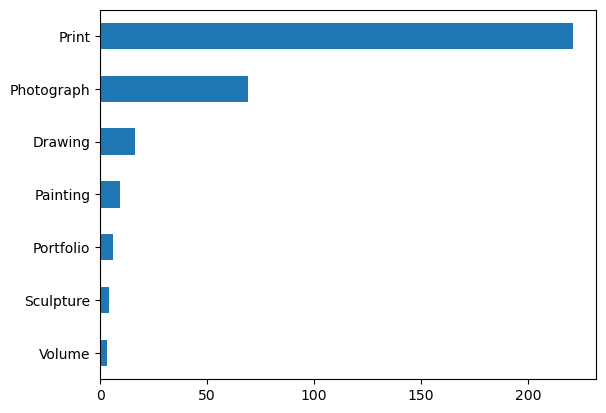

In [65]:
display_type = stored_latin_art.classification.value_counts().sort_values()
display_type.plot(kind='barh')

In [8]:
works_by_artist = stored_latin_art.groupby('preferreddisplayname').apply(len)

In [57]:
works_by_continent = stored_latin_art.groupby('Continent').apply(len).sort_values(ascending=True)

In [54]:
works_by_country = stored_latin_art.groupby('Country Name').apply(len).sort_values(ascending=True)

<AxesSubplot:ylabel='Continent'>

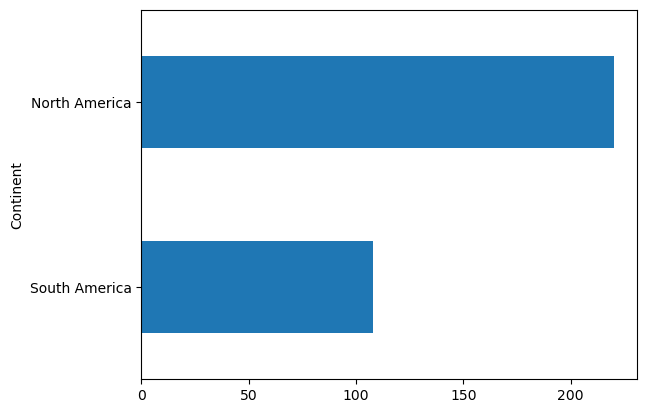

In [58]:
works_by_continent.plot(kind='barh')

<AxesSubplot:ylabel='Country Name'>

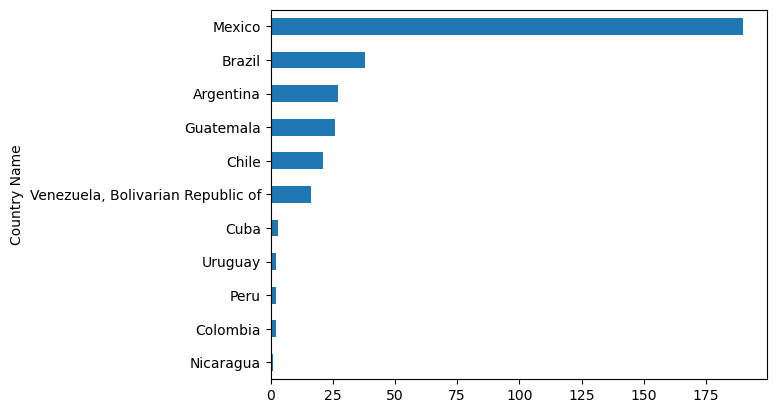

In [55]:
works_by_country.plot(kind='barh')

In [9]:
display(works_by_artist.sort_values(ascending=False))
display(works_by_artist.describe())

preferreddisplayname
Méndez, Leopoldo         28
Abularach, Rodolfo       22
Iturbide, Graciela       21
Matta                    18
Álvarez Bravo, Manuel    17
                         ..
Lam, Wifredo              1
Larez, Francisco          1
Anguiano, Raúl            1
Meinel, Javier Silva      1
Lovera, Héctor Rondón     1
Length: 68, dtype: int64

count    68.000000
mean      4.823529
std       5.992386
min       1.000000
25%       1.000000
50%       2.000000
75%       6.000000
max      28.000000
dtype: float64

## Feature Engineering

### Converting titles from Spanish to English to match preloaded english classification model

In [10]:
english_titles = pd.read_csv('../data_samples/results/en_titles.csv')
english_titles.drop('Unnamed: 0', axis=1, inplace=True)

In [11]:
stored_latin_art['en_translation'] = english_titles

In [12]:
text_dict = {}
for entry in stored_latin_art.en_translation:
    entry_words = entry.split(' ')
    for word in entry_words:
        word = word.strip(')([],\./')
        word = word.lower()
        if word in text_dict.keys():
            text_dict[word] += 1
        else:
            text_dict[word] = 1

In [13]:
title_occurrences = pd.Series(text_dict).sort_values(ascending=False)

In [14]:
title_occurrences.index

Index(['the', 'untitled', 'of', 'garden', 'a', 'in', 'woman', 'fontamara',
       'city', 'and',
       ...
       'have', 'photographs', 'blondes', 'world', 'third', 'desolation',
       'bravo', 'álvarez', 'manuel', 'maderista'],
      dtype='object', length=449)

In [15]:
import torch
import torch.nn.functional as fun
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
en_titles = stored_latin_art.en_translation.copy()

In [17]:
import re
def clean_words(text):
    def strip(string):
        return re.sub('(?:^[{\W}]+)|(?:[{\W}]+$)', '', string)
    text_arr = text.split(' ')
    words = []
    for word in text_arr:
        edited = strip(word)
        words.append(edited.lower())
    return ' '.join(words)

In [18]:
#cleaning and formatting the data to give uniformity and clarity
en_titles = en_titles.apply(clean_words)

### Converting text into tokens and making one-hot for word generalization across titles, medium, country origin, and artist name

In [26]:
one_hot_vectorizer = CountVectorizer(binary=True)
one_hot = one_hot_vectorizer.fit_transform(en_titles)

In [27]:
title_oh = pd.DataFrame(one_hot.toarray().tolist(), columns=one_hot_vectorizer.get_feature_names_out())

In [28]:
one_hot = one_hot_vectorizer.fit_transform(stored_latin_art.medium)
# Handling Duplicate Token Names in Columns (OH)
medium_cols = [x + ' (medium)' for x in one_hot_vectorizer.get_feature_names_out()]
medium_oh = pd.DataFrame(one_hot.toarray().tolist(), columns = medium_cols)

In [29]:
one_hot = one_hot_vectorizer.fit_transform(stored_latin_art['Country Name'], )
# Handling Duplicate Token Names in Columns (OH)
country_cols = [x + ' (country)' for x in one_hot_vectorizer.get_feature_names_out()]
country_oh = pd.DataFrame(one_hot.toarray().tolist(), columns = country_cols)

In [30]:
one_hot = one_hot_vectorizer.fit_transform(stored_latin_art['preferreddisplayname'])
# Handling Duplicate Token Names in Columns (OH)
name_cols = [x + ' (artist)' for x in one_hot_vectorizer.get_feature_names_out()]
artist_oh = pd.DataFrame(one_hot.toarray().tolist(), columns = name_cols)

In [31]:
oh_collection = pd.concat([title_oh, medium_oh, artist_oh, country_oh], axis=1)

In [32]:
oh_collection.head()

,17,1962,1972,1977,20,25,5x,abstraction,accident,aid,...,colombia (country),cuba (country),guatemala (country),mexico (country),nicaragua (country),of (country),peru (country),republic (country),uruguay (country),venezuela (country)
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### FE of Numerical Data

### feature containing % dataset created by individual artists

In [33]:
import scipy.stats as stats

In [34]:
percent_by_artist = stored_latin_art.preferreddisplayname.value_counts(normalize='True')

In [35]:
artist_zscore = stats.zscore(percent_by_artist)

In [36]:
stored_latin_art['artist_zscore'] = stored_latin_art.preferreddisplayname.apply(lambda x: artist_zscore[x])

In [37]:
stored_latin_art['percent_by_artist'] = stored_latin_art.preferreddisplayname.apply(lambda x: percent_by_artist[x])

In [38]:
stored_latin_art['log_percent_by_artist'] = stored_latin_art['percent_by_artist'].apply(lambda x: np.log(x + 1))

In [39]:
stored_latin_art['log_width'] = stored_latin_art['width'].apply(lambda x: np.log(x + 1))
stored_latin_art['log_height'] = stored_latin_art['height'].apply(lambda x: np.log(x + 1))

In [40]:
numerical_cols = ['log_width', 'log_height', 'log_percent_by_artist']

In [41]:
numerical_data = stored_latin_art.loc[:, numerical_cols]

### Final Collection of Transformed data

In [42]:
image_features = ['expanded_url', 'file_name', 'directory', 'file_downloaded']

In [43]:
image_data = stored_latin_art.loc[:, image_features]

In [44]:
print(image_data.shape)
print(oh_collection.shape)
print(numerical_data.shape)

(328, 4)
(328, 727)
(328, 3)


In [45]:
transformed_data = pd.concat([image_data, oh_collection, numerical_data], axis=1)

In [46]:
transformed_data.head()

,expanded_url,file_name,directory,file_downloaded,17,1962,1972,1977,20,25,...,mexico (country),nicaragua (country),of (country),peru (country),republic (country),uruguay (country),venezuela (country),log_width,log_height,log_percent_by_artist
0,https://api.nga.gov/iiif/95bc5221-79a1-49e1-b7...,Festival_Andino.jpg,./All_Images,True,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.994295,8.294300,0.003044
1,https://api.nga.gov/iiif/f8a0c85d-7cfa-4e63-ae...,Chester_Dale.jpg,./All_Images,True,0,0,0,0,0,0,...,1,0,0,0,0,0,0,8.575085,8.336151,0.018127
2,https://api.nga.gov/iiif/a2bc5dff-08a4-46d5-97...,Compostion_XVI.jpg,./All_Images,True,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.981733,8.294300,0.053425
3,https://api.nga.gov/iiif/c73c0136-d48d-4bea-89...,Compostion_IV.jpg,./All_Images,True,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.294300,8.039802,0.053425
4,https://api.nga.gov/iiif/1f1918c9-9d30-4491-a9...,Compostion_I.jpg,./All_Images,True,0,0,0,0,0,0,...,0,0,0,0,0,0,0,8.294300,8.034307,0.053425


In [47]:
transformed_data.to_csv('../data_samples/results/transformed_la_art.csv', index=False)